The **malthusian growth** or **exponential growth** model describes a population that increases at a rate proportional to its current size, assuming unlimited resources and no competition. The fundamental differential equation for exponential growth is:
$$\frac{dN}{dt} = rN$$

| **Term**        | **Meaning**                                       | **Units (Typical)**            |
| --------------- | ------------------------------------------------- | ------------------------------ |
| $N$             | Population size (abundance)                       | Individuals (count)            |
| $t$             | Time                                              | Seconds, hours, or years       |
| $\frac{dN}{dt}$ | The rate of change of the population over time    | Individuals per unit time      |
| $r$             | Intrinsic rate of increase (malthusian parameter) | $time^{-1}$ (e.g., $day^{-1}$) |

To apply this model, the following biological conditions are assumed to hold:

- **Closed Population:** There is no immigration or emigration.
- **Constant Growth Rate:** The per capita rate of increase ($r$) remains constant regardless of population density.
- **Continuous Growth:** The population has overlapping generations and births/deaths occur continuously.

> In biological modeling, the assumption of **overlapping generations** and **continuous growth** is what allows us to transition from discrete math (difference equations) to calculus (differential equations).

> **Overlaping generation** means that individuals of different ages coexist and reproduce at the same time. There is no synchronized life cycle where the entire parental generation dies off before the offspring mature. In a human population or a bacterial colony, you have "grandparents," "parents," and "children" all present simultaneously. Because generations overlap, the population doesn't "jump" in size at specific intervals (like annual plants that all bloom in spring). Instead, the population size $N$ is treated as a **differentiable function of time**, $N(t)$.

> **Continuous growth** assumes that at any infinitesimally small moment in time ($dt$), there is a probability that an event (birth or death) occurs. Births and deaths are not restricted to specific "seasons" or "pulses." It allows us to define the rate of change using a derivative. If births were pulsed (e.g., deer giving birth only in May), we would have to use Discrete-Time Models (Difference Equations):$N_{t+1} = \lambda N_t$. By assuming continuity, we use Continuous-Time Models (Differential Equations):$\frac{dN}{dt} = rN$.

- **Unlimited Resources:** Space, food, and nutrients are infinite; there is no carrying capacity constraint.
- **Homogeneity:** All individuals in the population are identical in their probability of reproducing or dying.

To find the population size at any time $t$, we solve the ODE $\frac{dN}{dt} = rN$ via **separation of variables**:

1. **Separate the variables $N$ and $t$:**$$\frac{1}{N} dN = r dt$$
2. **Integrate both sides:**$$\int \frac{1}{N} dN = \int r dt$$
3. **Evaluate the integrals:**$$\ln|N| = rt + C$$
4. **Exponentiate both sides to solve for $N$:** $$e^{\ln|N|} = e^{rt + C}$$ $$N(t) = e^C \cdot e^{rt}$$
5. **Solve for the constant using initial conditions:** At $t = 0$, $N(0) = N_0$.$$N_0 = e^C \cdot e^{r(0)}$$ $$N_0 = e^C \cdot 1 \implies e^C = N_0$$
6. **Final Solution:**$$N(t) = N_0 e^{rt}$$

Since the growth is not bounded by any feedback mechanism (the derivative $\frac{dN}{dt}$ never decreases as $N$ increases), the system exhibits **positive feedback**. If $r > 0$, $N(t) \to \infty$ as $t \to \infty$. Mathematically, the system is **unstable** because any slight increase above $N=0$ leads to an explosion of the state variable rather than a return to equilibrium.

The system has a fixed point (equilibrium) at $N^* = 0$. In a 1D system $\dot{N} = f(N)$, the eigenvalue is simply the derivative of the function evaluated at the steady state. For $f(N) = rN$, the derivative $f'(N) = r$.

- If $r > 0$, the eigenvalue is positive, meaning the equilibrium at zero is **unstable** (the population grows away from it).
- If $r < 0$, the eigenvalue is negative, meaning the equilibrium is **stable** (the population decays toward extinction).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.style.use('seaborn-v0_8-whitegrid')

In [15]:
def malthusian_model(N: float, t: float, r: float) -> float:
    """
    dN/dt = r * N
    """
    return r * N

### Time Evolution

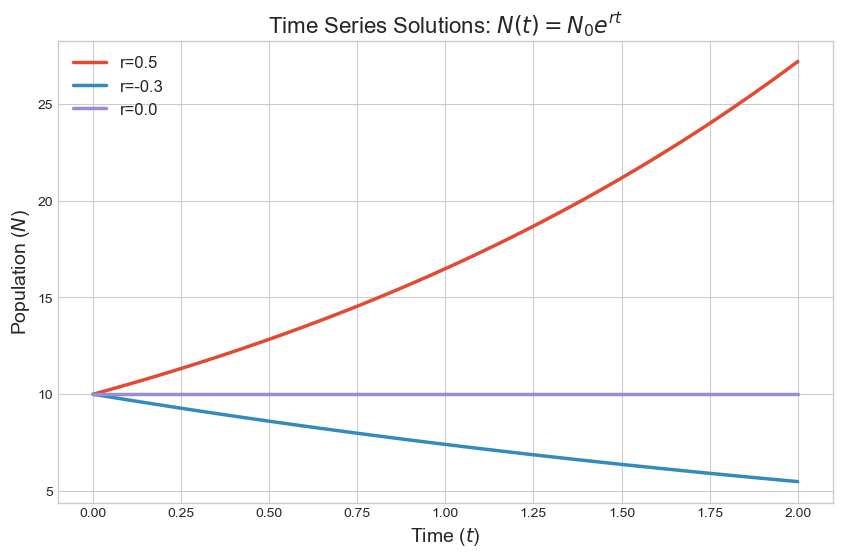

In [16]:
t = np.linspace(0, 2, 100)   # Time steps from 0 to 2
N0 = 10                      # Initial population
r_values = [0.5, -0.3, 0.0]  # Different growth rates: Positive, Negative, Zero

fig, ax = plt.subplots(figsize=(10, 6))

for r in r_values:
    N_t = odeint(malthusian_model, N0, t, args=(r,))
    ax.plot(t, N_t, linewidth=2.5, label=f"r={r}")

ax.set_title('Time Series Solutions: $N(t) = N_0 e^{rt}$', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Population ($N$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()

### Slope Field

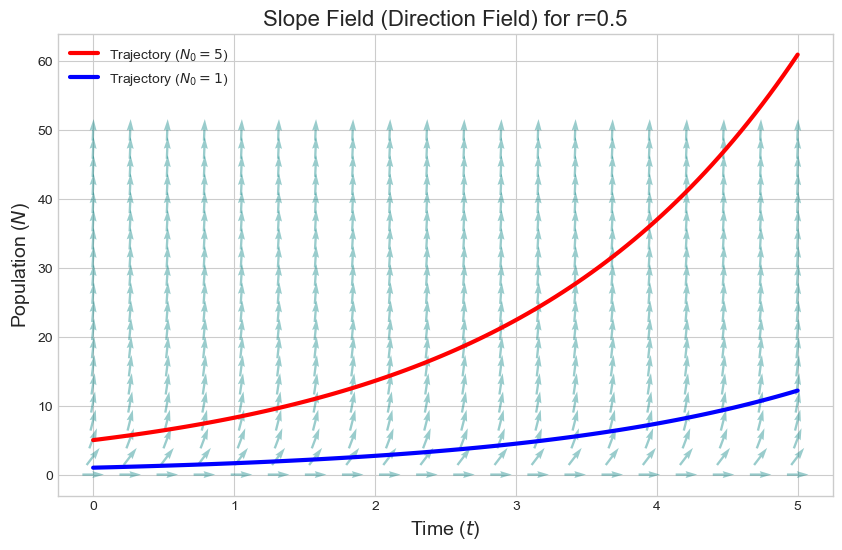

In [24]:
t_mesh = np.linspace(0, 5, 20)      # time from 0 to 5
N_mesh = np.linspace(0, 50, 20)     # initial population from 0 to 50
T, N = np.meshgrid(t_mesh, N_mesh)  # grid of time and initial population

r_slope = 0.5
dN = r_slope * N
dT = np.ones(dN.shape)

L = np.sqrt(dT**2 + dN**2)
dT_norm = dT / L
dN_norm = dN / L

fig, ax = plt.subplots(figsize=(10, 6))
ax.quiver(T, N, dT_norm, dN_norm, color='teal', alpha=0.4, pivot='mid')

t_traj = np.linspace(0, 5, 100)

N_traj = odeint(malthusian_model, y0=5, t=t_traj, args=(r_slope,))
ax.plot(t_traj, N_traj, 'r-', linewidth=3, label='Trajectory ($N_0=5$)')

N_traj2 = odeint(malthusian_model, y0=1, t=t_traj, args=(r_slope,))
ax.plot(t_traj, N_traj2, 'b-', linewidth=3, label='Trajectory ($N_0=1$)')

ax.set_title(f'Slope Field (Direction Field) for r={r_slope}', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Population ($N$)', fontsize=14)
ax.legend()

plt.show()

### Stability Analysis

In [25]:
def analyze_stability(r):
    """
    Prints the stability analysis for a Malthusian model with rate r.
    """
    print(f"{'-'*30}")
    print(f"Stability Analysis for r = {r}")
    print(f"{'-'*30}")
    
    # The Jacobian (derivative of f(N) with respect to N) is simply r
    eigenvalue = r
    
    print(f"Differential Equation: dN/dt = {r}N")
    print(f"Fixed Point: N* = 0")
    print(f"Jacobian (Eigenvalue) at N*: J = {eigenvalue}")
    
    if eigenvalue < 0:
        print(">> Result: The fixed point is STABLE (Sink).")
        print(">> Interpretation: Population will die out to 0.")
    elif eigenvalue > 0:
        print(">> Result: The fixed point is UNSTABLE (Source).")
        print(">> Interpretation: Any small population will grow exponentially.")
    else:
        print(">> Result: The fixed point is NEUTRALLY STABLE.")
        print(">> Interpretation: Population remains constant.")
    print("\n")

analyze_stability(r=0.5)
analyze_stability(r=-0.2)

------------------------------
Stability Analysis for r = 0.5
------------------------------
Differential Equation: dN/dt = 0.5N
Fixed Point: N* = 0
Jacobian (Eigenvalue) at N*: J = 0.5
>> Result: The fixed point is UNSTABLE (Source).
>> Interpretation: Any small population will grow exponentially.


------------------------------
Stability Analysis for r = -0.2
------------------------------
Differential Equation: dN/dt = -0.2N
Fixed Point: N* = 0
Jacobian (Eigenvalue) at N*: J = -0.2
>> Result: The fixed point is STABLE (Sink).
>> Interpretation: Population will die out to 0.


